# __Theoretical Lock in Amplifier__

In [4]:
from scipy.fft import fft, fftfreq,ifft,ifftshift
import numpy as np

In [5]:
f=1000 #Hz
N_sample = 8192
N_div=64
t_gap = (1/(f*N_div))*10**6 #us

In [6]:
################################ Generating input Sine wave  ################################
sine=[]
time=[]
for i in range(N_sample):
    # sine.append(2*(1-np.cos(2*np.pi*f*i*t_gap*10**-6)))
    sine.append(1*(np.sin(2*np.pi*f*i*t_gap*10**-6))+0.5*(np.sin(2*np.pi*50*f*i*t_gap*10**-6)))
    time.append(i*t_gap*(10**-6))

In [7]:
#################################  Reference waves  #################################
sine_ref=[]
cos_ref=[]
for i in range(N_sample):
    sine_ref.append(2*np.sin(2*np.pi*f*i*t_gap*10**-6))
    cos_ref.append(2*np.cos(2*np.pi*f*i*t_gap*10**-6))
    

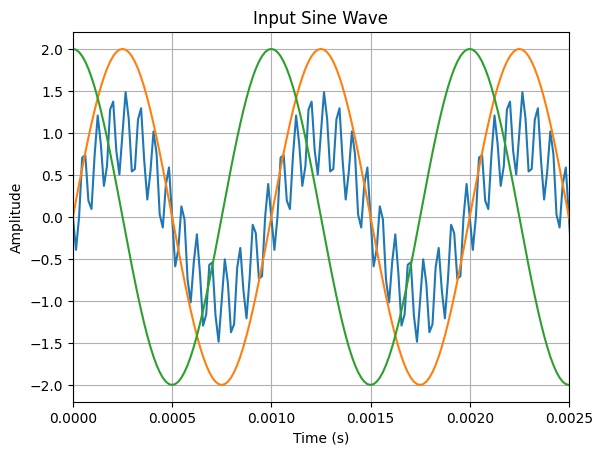

In [8]:
import matplotlib.pyplot as plt_spacetime
plt_spacetime.plot(time,sine)
plt_spacetime.plot(time,sine_ref)
plt_spacetime.plot(time,cos_ref)
plt_spacetime.xlabel('Time (s)')
plt_spacetime.ylabel('Amplitude')
plt_spacetime.title('Input Sine Wave')
plt_spacetime.grid(True)
plt_spacetime.xlim(0,0.0025)
plt_spacetime.show()

In [9]:
sin_pm=[]
cos_pm=[]
for i in range(N_sample):
    sin_pm.append(sine[i]*sine_ref[i])
    cos_pm.append(sine[i]*cos_ref[i])

In [10]:
freq=fftfreq(N_sample,time[1]-time[0])
sine_0_fft=fft(sin_pm)
sine_90_fft=fft(cos_pm)
# print(sine_fft)

d:\Libraries\Python3.12\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Libraries\Python3.12\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


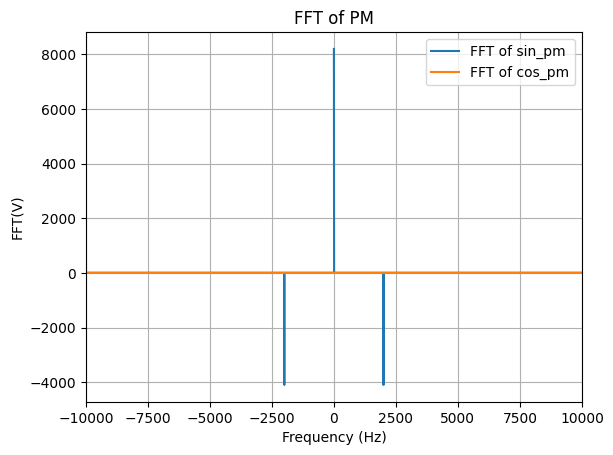

In [11]:
import matplotlib.pyplot as plt_fft
plt_fft.plot(freq,sine_0_fft,label='FFT of sin_pm')
plt_fft.plot(freq,sine_90_fft,label='FFT of cos_pm')
plt_fft.xlabel('Frequency (Hz)')
plt_fft.ylabel('FFT(V)')
plt_fft.title('FFT of PM')
plt_fft.legend()
plt_fft.grid(True)
plt_fft.xlim(-10000,10000)
plt_fft.show()

In [12]:
# print(sine_0_fft[0].real/len(sine_0_fft))
# print(sine_90_fft[0]/len(sine_90_fft))
print("Voltage=", np.sqrt((sine_0_fft[0].real/len(sine_0_fft))**2+(sine_90_fft[0]/len(sine_90_fft))**2).real)

Voltage= 0.999999999999998
